In [1]:
cd ..

/home/hyunjun/workspace/execution


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

[Features] <br>
**midpoint** = the midpoint between the best bid and the best ask <br>
**spread** = the difference between the best bid and the best ask <br>

**bids_distance_x** = the distance of bid level x from the midprice in % <br> 
**asks_distance_x** = the distance of ask level x from the midprice in % <br>

**bids_market_notional_x** = volume of market orders at bid level x <br>
**bids_limit_notional_x** = volume of limit orders at bid level x <br>
**bids_cancel_notional_x** = volume of canceled orders at bid level x <br>

**asks_market_notional_x** = volume of market orders at ask level x <br>
**asks_limit_notional_x** = volume of limit orders at ask level x <br>
**asks_cancel_notional_x** = volume of canceled orders at ask level x 

In [3]:
data = pd.read_csv('/home/hyunjun/workspace/execution/BTC_1min.csv', index_col=0)
data

,system_time,midpoint,spread,buys,sells,bids_distance_0,bids_distance_1,bids_distance_2,bids_distance_3,bids_distance_4,...,asks_market_notional_5,asks_market_notional_6,asks_market_notional_7,asks_market_notional_8,asks_market_notional_9,asks_market_notional_10,asks_market_notional_11,asks_market_notional_12,asks_market_notional_13,asks_market_notional_14
0,2021-04-07 11:33:41.122161+00:00,55896.285,0.01,4.448599e+06,3.899402e+06,-8.945138e-08,-0.000065,-0.000073,-0.000154,-0.000162,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1176.72998,0.0
1,2021-04-07 11:34:41.122161+00:00,55948.685,1.43,1.243244e+06,3.606502e+06,-1.277957e-05,-0.000013,-0.000242,-0.000242,-0.000259,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
2,2021-04-07 11:35:41.122161+00:00,56013.785,0.01,3.069094e+06,1.575759e+06,-8.926374e-08,-0.000009,-0.000070,-0.000088,-0.000173,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
3,2021-04-07 11:36:41.122161+00:00,55903.575,7.17,1.220819e+06,1.321487e+06,-6.412827e-05,-0.000182,-0.000188,-0.000225,-0.000310,...,0.000000,312.040009,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
4,2021-04-07 11:37:41.122161+00:00,55899.995,0.01,2.011287e+06,3.083005e+06,-8.944544e-08,-0.000129,-0.000130,-0.000143,-0.000201,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17108,2021-04-19 09:50:00.386544+00:00,56878.090,6.54,7.205687e+04,1.542092e+05,-5.749138e-05,-0.000058,-0.000068,-0.000094,-0.000101,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
17109,2021-04-19 09:51:00.386544+00:00,56944.085,2.57,9.383907e+04,3.085079e+04,-2.256600e-05,-0.000028,-0.000088,-0.000093,-0.000100,...,549.880005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
17110,2021-04-19 09:52:00.386544+00:00,56873.165,0.01,3.366408e+05,1.198253e+05,-8.791493e-08,-0.000069,-0.000128,-0.000189,-0.000203,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0
17111,2021-04-19 09:53:00.386544+00:00,56820.445,0.01,3.118859e+04,8.355952e+04,-8.799650e-08,-0.000039,-0.000088,-0.000113,-0.000143,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0


In [4]:
new_data = pd.DataFrame()
new_data['system_time'] = data['system_time']
new_data['midpoint'] = data['midpoint']
new_data['spread'] = data['spread']

for i in range(1, 11):
    new_data[f'bid{i}'] = data['midpoint'] * (1 + data[f'bids_distance_{i}'])
    new_data[f'ask{i}'] = data['midpoint'] * (1 + data[f'asks_distance_{i}'])

for i in range(1, 11):
    new_data[f'bid{i}_v'] = data[f'bids_limit_notional_{i}']
    new_data[f'ask{i}_v'] = data[f'asks_limit_notional_{i}']


new_data['system_time'] = pd.to_datetime(new_data['system_time'])
new_data.set_index('system_time')
new_data = new_data[745:1045]
new_data = new_data.reset_index(drop=True)
new_data

,system_time,midpoint,spread,bid1,ask1,bid2,ask2,bid3,ask3,bid4,...,bid6_v,ask6_v,bid7_v,ask7_v,bid8_v,ask8_v,bid9_v,ask9_v,bid10_v,ask10_v
0,2021-04-08 00:00:59.968678+00:00,55962.105,0.01,55958.88,55962.12,55955.74,55962.90,55941.089999,55962.91,55934.620000,...,19998.089844,8394.820312,2345.419922,20011.230469,2796.110107,22386.279297,279.859985,16047.269531,150.000000,430651.187500
1,2021-04-08 00:01:59.968678+00:00,55975.995,0.01,55975.17,55979.10,55974.37,55979.92,55973.570000,55982.96,55971.980000,...,161479.156250,8398.509766,8394.410156,5599.049805,13284.580078,20012.980469,453.540009,7838.759766,8393.330078,1119.849976
2,2021-04-08 00:02:59.968678+00:00,55862.065,0.01,55861.76,55862.08,55860.00,55865.00,55859.790000,55865.01,55855.150000,...,55877.339844,9213.889648,51090.781250,10752.799805,5000.000000,20011.650391,4970.649902,2410.520020,361.630005,15440.200195
3,2021-04-08 00:03:59.968678+00:00,55859.095,0.01,55856.39,55861.99,55855.11,55865.99,55853.140000,55866.29,55852.000000,...,2287.229980,59.320000,145.910004,916.270020,9513.150391,8380.650391,20002.410156,916.289978,82249.648438,122.919998
4,2021-04-08 00:04:59.968678+00:00,55899.375,2.37,55898.18,55900.59,55895.42,55900.61,55892.910000,55901.18,55892.240000,...,20003.119141,916.809998,95.610001,149966.828125,5000.000000,144795.015625,10301.330078,5000.000000,5588.370117,133.740005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021-04-08 04:56:00.122668+00:00,56999.005,0.01,56991.15,56999.02,56988.85,56999.83,56988.390000,57000.58,56986.060000,...,5000.000000,917.719971,20004.820312,348.000000,462.690002,103832.062500,20004.279297,57003.558594,19933.830078,13510.500000
296,2021-04-08 04:57:00.122668+00:00,56947.215,0.01,56946.04,56947.23,56945.20,56949.44,56941.420000,56949.49,56941.410000,...,512.460022,916.900024,0.000000,916.919983,4839.419922,916.929993,5899.770020,4898.080078,5000.000000,2847.719971
297,2021-04-08 04:58:00.122668+00:00,56929.565,0.01,56926.74,56929.58,56926.33,56936.60,56923.580000,56941.19,56923.250000,...,19917.730469,1708.280029,349840.562500,521.590027,15966.419922,5694.430176,17645.519531,16984.869141,20005.800781,2847.340088
298,2021-04-08 04:59:00.122668+00:00,56925.005,0.01,56922.10,56925.02,56921.05,56930.81,56921.040000,56930.82,56920.060000,...,20005.279297,1998.260010,5691.310059,5111.930176,0.000000,20014.429688,11154.589844,1708.219971,2845.560059,31316.000000


In [5]:
pd.read_csv('data.csv', index_col=0)

,system_time,midpoint,spread,bid1,ask1,bid2,ask2,bid3,ask3,bid4,...,bid6_v,ask6_v,bid7_v,ask7_v,bid8_v,ask8_v,bid9_v,ask9_v,bid10_v,ask10_v
0,2021-04-08 00:00:59.968678+00:00,55962.105,0.01,55958.88,55962.12,55955.74,55962.90,55941.089999,55962.91,55934.620000,...,19998.089844,8394.820312,2345.419922,20011.230469,2796.110107,22386.279297,279.859985,16047.269531,150.000000,430651.187500
1,2021-04-08 00:01:59.968678+00:00,55975.995,0.01,55975.17,55979.10,55974.37,55979.92,55973.570000,55982.96,55971.980000,...,161479.156250,8398.509766,8394.410156,5599.049805,13284.580078,20012.980469,453.540009,7838.759766,8393.330078,1119.849976
2,2021-04-08 00:02:59.968678+00:00,55862.065,0.01,55861.76,55862.08,55860.00,55865.00,55859.790000,55865.01,55855.150000,...,55877.339844,9213.889648,51090.781250,10752.799805,5000.000000,20011.650391,4970.649902,2410.520020,361.630005,15440.200195
3,2021-04-08 00:03:59.968678+00:00,55859.095,0.01,55856.39,55861.99,55855.11,55865.99,55853.140000,55866.29,55852.000000,...,2287.229980,59.320000,145.910004,916.270020,9513.150391,8380.650391,20002.410156,916.289978,82249.648438,122.919998
4,2021-04-08 00:04:59.968678+00:00,55899.375,2.37,55898.18,55900.59,55895.42,55900.61,55892.910000,55901.18,55892.240000,...,20003.119141,916.809998,95.610001,149966.828125,5000.000000,144795.015625,10301.330078,5000.000000,5588.370117,133.740005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2021-04-08 04:56:00.122668+00:00,56999.005,0.01,56991.15,56999.02,56988.85,56999.83,56988.390000,57000.58,56986.060000,...,5000.000000,917.719971,20004.820312,348.000000,462.690002,103832.062500,20004.279297,57003.558594,19933.830078,13510.500000
296,2021-04-08 04:57:00.122668+00:00,56947.215,0.01,56946.04,56947.23,56945.20,56949.44,56941.420000,56949.49,56941.410000,...,512.460022,916.900024,0.000000,916.919983,4839.419922,916.929993,5899.770020,4898.080078,5000.000000,2847.719971
297,2021-04-08 04:58:00.122668+00:00,56929.565,0.01,56926.74,56929.58,56926.33,56936.60,56923.580000,56941.19,56923.250000,...,19917.730469,1708.280029,349840.562500,521.590027,15966.419922,5694.430176,17645.519531,16984.869141,20005.800781,2847.340088
298,2021-04-08 04:59:00.122668+00:00,56925.005,0.01,56922.10,56925.02,56921.05,56930.81,56921.040000,56930.82,56920.060000,...,20005.279297,1998.260010,5691.310059,5111.930176,0.000000,20014.429688,11154.589844,1708.219971,2845.560059,31316.000000


<BarContainer object of 10 artists>

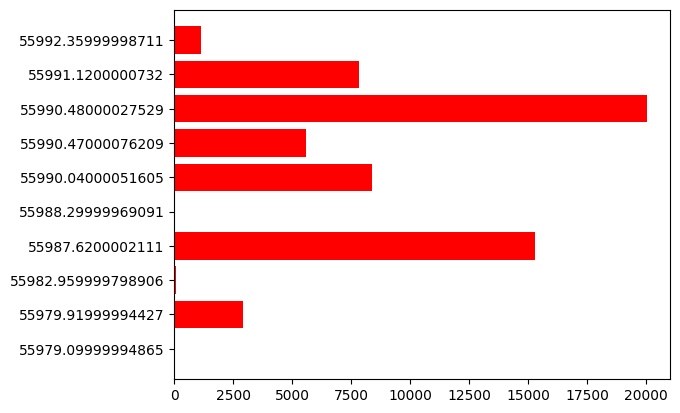

In [6]:
i = 1

x = [i for i in range(1, 11)]
y = new_data.iloc[i][[f'ask{i}_v' for i in range(1, 11)]]

plt.yticks(x, new_data.iloc[i][[f'ask{i}' for i in range(1, 11)]])
plt.barh(x, y, color='red')

<BarContainer object of 10 artists>

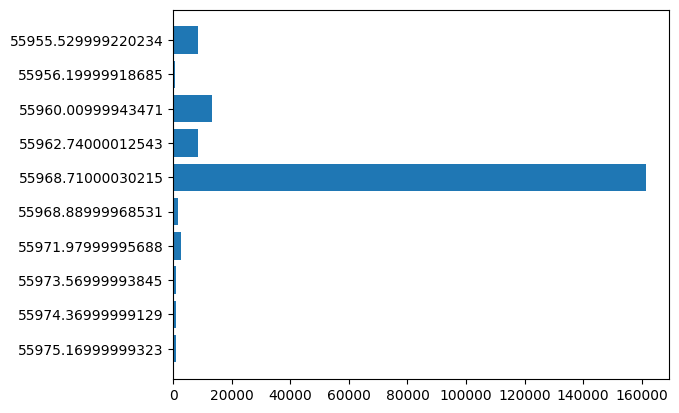

In [7]:
x = [i for i in range(1, 11)]
y = new_data.iloc[i][[f'bid{i}_v' for i in range(1, 11)]]

plt.yticks(x, new_data.iloc[i][[f'bid{i}' for i in range(1, 11)]])
plt.barh(x, y)

### market state 정의


In [8]:
observe = new_data.iloc[5].to_dict()
minute = observe['system_time'].minute

bid_ask_spread = observe['spread']
mid_price = observe['midpoint']
ask_volumes = [observe[f'ask{i}_v'] for i in range(1, 11)]
bid_volumes = [observe[f'bid{i}_v'] for i in range(1, 11)]

volumes = ask_volumes + bid_volumes
ask_volume = sum(ask_volumes)
bid_volume = sum(bid_volumes)
imbalance = bid_volume - ask_volume

### Execution Rule

(1) 대기 주문은 10분 이후 취소 주문 <br>
(2) 새로운 주문도 10분마다 <br>
(2) 임팩트는 없다고 가정하고 주문은 1000 볼륨씩 넣는다.

In [9]:
import numpy as np
import torch
import torch.nn as nn
import random

class ReplayMemory:
  def __init__(self, max_size):
    self.buffer = [None]*max_size
    self.max_size = max_size
    self.index = 0
    self.size = 0

  def push(self, obj):
    self.buffer[self.index] = obj
    self.size = min(self.size+1, self.max_size)
    self.index = (self.index+1) % self.max_size

  def sample(self, batch_size):
    indices = random.sample(range(self.size), batch_size)
    return [self.buffer[index] for index in indices]

  def __len__(self):
    return self.size
  
class Qnet(nn.Module):
    def __init__(self, s_dim, a_dim):
        super().__init__()

        self.s_dim = s_dim
        self.a_dim = a_dim

        self.layer1 = nn.Linear(s_dim, 64)
        self.layer2 = nn.Linear(64, 64)
        self.layer3 = nn.Linear(64, a_dim)
        self.act = nn.ReLU()

    def forward(self, s):
       x = self.act(self.layer1(s))
       x = self.act(self.layer2(x))
       a = self.layer3(x)
       return a

In [10]:
def execution(price, volume, observe):
    order_volume = volume
    
    sell_tax = 0.003
    sell_fee = 0.015
    cost = sell_tax + sell_fee

    volumes = np.array([observe[f'ask{i}_v'] for i in range(1, 11)])
    prices = np.array([observe[f'ask{i}'] for i in range(1, 11)])
    indice = np.where(prices <= price)[0]    
    level = indice[-1] + 1 if len(indice) > 0 else 0

    executed_volumes = []

    executed_price = 0
    executed_volume = 0
    executed_volume = volume

    volumes_ = volumes[:level]
    prices_ = prices[:level]
                
    for i in range(level):
        executed_v = min(order_volume, volumes_[i])
        executed_volumes.append(executed_v)
        order_volume -= executed_v

    executed_volume = sum(executed_volumes)
    remain_volume = order_volume
    executed_price = np.inner(prices_, executed_volumes) * (1-cost) 

    return executed_volume, remain_volume, executed_price

In [11]:
qnet = Qnet(s_dim=23, a_dim=20)

def tensorize(array):
    tensor = torch.tensor(np.array(array).reshape(1,-1))
    tensor = tensor.float()
    return tensor

def make_batch(transition):
    x = list(zip(*transition))
    x = list(map(torch.cat, x))
    return x

def get_reward(executed_at_mid, executed_price):
    gap = executed_price - executed_at_mid
    reward = gap / 1e5
    return reward

def get_state(observe):
    bid_ask_spread = observe['spread']
    mid_price = observe['midpoint']
    ask_volumes = [observe[f'ask{i}_v'] for i in range(1, 11)]
    bid_volumes = [observe[f'bid{i}_v'] for i in range(1, 11)]

    volumes = ask_volumes + bid_volumes
    ask_volume = sum(ask_volumes)
    bid_volume = sum(bid_volumes)
    imbalance = bid_volume - ask_volume
    state = [bid_ask_spread, mid_price, imbalance] + volumes
    return state

def get_action(state, eps):
    state = torch.tensor(state).float()
    state = torch.unsqueeze(state, 0)

    prob = np.random.uniform(low=0.0, high=1.0, size=1)
    prob = torch.tensor(prob).float()

    if prob <= eps:
        action = np.random.choice(range(20))
        return action

    q_value = qnet(state).detach()
    action = q_value.argmax(dim=-1)
    action = action.squeeze(0).item()
    return action

def action2level(action):
    bid_levels = list(range(1, 11))
    ask_levels = list(range(-10, 0))
    levels = bid_levels + ask_levels
    level = levels[action]
    return level

def level2action(level):
    bid_levels = list(range(1, 11))
    ask_levels = list(range(-10, 0))
    levels = bid_levels + ask_levels
    action = levels.index(level)
    return action

def get_timing(observe, cut):
    hour = observe['system_time'].hour
    minute = observe['system_time'].minute
    minutes = 60 * hour + minute

    if minutes % cut == 0:
        return  True
    else:
        return False

In [12]:
waiting = 20
time_cut = 10
target_volume = 30000
minima_volume = 1000
sell_money = 0
buffer = ReplayMemory(1000)
H = 300

pending_orders = []


for time in range(H):

    done = time // (H-1)
    base_volume = min(minima_volume, target_volume) 

    observe = new_data.iloc[time].to_dict()
    observe_ = new_data.iloc[min(time+time_cut, H-1)].to_dict()

    timing = get_timing(observe, time_cut)

    # 대기 주문 관리 
    for _ in range(len(pending_orders)):

        order = pending_orders.pop(0)
        term = time - order['time']
            
        price = observe['ask10'] if done else order['price']
        result = execution(price, order['volume'], observe)

        executed_volume = result[0] 
        remain_volume = result[1] 
        executed_price = result[2]  

        target_volume -= executed_volume
        sell_money += executed_price

        executed_at_mid = order['target'] * order['mid']
        executed_price_cum = order['executed_price_cum'] + executed_price
        
        state = get_state(order['observe'])
        next_state = get_state(order['observe_'])
        action = level2action(order['level'])
        reward = None

        if remain_volume == 0:
            reward = get_reward(executed_at_mid, executed_price_cum)

        if term >= waiting:
            reward = -5

        if (remain_volume > 0) & (term < waiting):

            pending_order = {
                'price':limit_price,
                'volume':remain_volume,
                'observe':order['observe'],
                'observe_':order['observe_'],
                'level': order['level'],
                'target':order['target'],
                'time':order['time'],
                'mid':order['mid'],
                'executed_price_cum':executed_price_cum,
                }
            
            pending_orders.append(pending_order)

        if reward is not None:
            sample = [state, action, reward, next_state, done]
            sample = list(map(tensorize, sample))
            buffer.push(sample) 

    # RL에 의한 주문 생성
    if timing or done:

        state = get_state(observe)
        next_state = get_state(observe_)

        action = get_action(state, 0.9) 
        level = action2level(action) if not done else 10
        
        limit_price = observe[f'ask{level}'] \
            if level > 0 else observe[f'bid{abs(level)}']
        limit_volume = observe[f'ask{level}_v'] \
            if level > 0 else observe[f'bid{abs(level)}_v']
        
        result = execution(limit_price, base_volume, observe)

        executed_volume = result[0]
        remain_volume = result[1]
        executed_price = result[2] 
        
        target_volume -= executed_volume
        sell_money += executed_price
        
        # 전량 체결 되면 transition으로 사용
        if remain_volume == 0:
            
            executed_at_mid = executed_volume * observe['midpoint']
            reward = get_reward(executed_at_mid, executed_price)
            sample = [state, action, reward, next_state, done]
            sample = list(map(tensorize, sample))
            buffer.push(sample) 

        # 일부 체결 되면 잔량에 대한 대기 주문 생성 
        if remain_volume > 0:
            
            pending_order = {
                'time':time,
                'observe':observe,
                'observe_':observe_,
                'level': level,
                'price':limit_price,
                'volume':remain_volume,
                'target':base_volume,
                'executed_price_cum':executed_price,
                'mid':observe['midpoint']}
            
            pending_orders.append(pending_order)

In [13]:
samples = buffer.sample(len(buffer))
state, action, reward, next_state, done = make_batch(samples)

qnet = Qnet(s_dim=23, a_dim=20)
qnet_target = Qnet(s_dim=23, a_dim=20)

mse = torch.nn.MSELoss()
opt = torch.optim.Adam(qnet.parameters(), lr=1e-4)

q_max, _ = qnet_target(next_state).max(dim=-1, keepdims=True)
target = reward + 0.99 * q_max * (1-done)

q = qnet(state).gather(1, action.type(torch.int64))
loss = mse(q, target)
opt.zero_grad()
loss.backward()
opt.step()

loss.item()

2324385536.0

In [860]:
# 정해진 시간마다 시장가로 사기

waiting = 15
time_cut = 10
target_volume = 30000
minima_volume = 1000
sell_money_bm = 0
H = 300

pending_orders = []

for time in range(H):

    done = time // (H-1)
    base_volume = min(minima_volume, target_volume) 

    observe = new_data.iloc[time].to_dict()
    timing = get_timing(observe, time_cut)

    # RL에 의한 새로운 주문
    if timing & (not done):
        
        action = 10
    
        limit_price = observe[f'ask{action}'] \
            if action > 0 else observe[f'bid{abs(action)}']
        limit_volume = observe[f'ask{action}_v'] \
            if action > 0 else observe[f'bid{abs(action)}_v']

        result = execution(limit_price, base_volume, observe)

        executed_volume = result[0]
        remain_volume = result[1]
        executed_price = result[2] 
        
        target_volume -= executed_volume
        sell_money_bm += executed_price

        executed_at_mid = executed_volume * observe['midpoint']
        reward = get_reward(executed_at_mid, executed_price)

In [861]:
sell_money, sell_money_bm

(1607046969.6819913, 1607050746.4040296)

In [2]:
from network import Qnet
from buffer import Buffer
from simulator import Simulator

config = {
    'waiting': 20,
    'time_cut': 10,
    'target_volume': 30000,
    'minima_volume': 1000,
    'episode': 10000,
    'batch_size': 64,
    }

buffer = Buffer(1000)
qnet = Qnet(s_dim=23, a_dim=20)
simulator = Simulator(qnet, buffer)
simulator.play_horizon(config)

(1662673759.9350429, -306.59755064956937)